In [1]:
from pycbc import distributions
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv

In [2]:

print("Generated Binary Mass Distributions for BBH")

bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)

Generated Binary Mass Distributions for BBH


In [3]:
print("Using Binary Mass Distributions to generate BBH waveforms")
print("Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...")

for i in tqdm(range(len(bbh_two_mass_samples))):

    hp, hc = get_td_waveform(approximant="SEOBNRv2",                                # what are hp and hc?
                         mass1=bbh_two_mass_samples[i][0],
                         mass2=bbh_two_mass_samples[i][1],
                         delta_t=1.0/4096,
                         f_lower=40)                                                # change to 40 Hz

    noise = TimeSeries(np.random.normal(scale=1, size=16384), sample_rate=4096)    # did not understand clearly    # try scale = 1 
    noise= noise*1e-18
    # st = np.random.randint(0,2)
    
    st = 1

    signal = TimeSeries.from_pycbc(hp)
    
    signal.write("data/bbh_signal.txt")
    noise.write("data/noise/noise.txt")
    
    signal.t0 = st
    data = noise.inject(signal)
    
    data.write("data/merged/bbh_merged_noise_signal.txt")

Using Binary Mass Distributions to generate BBH waveforms
Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# MERGING NOISE + SIgnal Templates into single file


#for i in tqdm(range(5)):
path = "data/merged/"
files= os.listdir(path)
f = open('data/Final_BBH_Merged_Noise_Signal.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# MERGING NOISE Templates into single file

path_1 = "data/noise/"
files_1= os.listdir(path_1)
f1 = open('data/Final_Merged_Noise_Reduced_No_Abs.csv', 'w')
cw_1 = csv.writer(f1)

for i in tqdm(files_1):
    #print(files)
    df = pd.read_csv(path_1+i,sep = ' ', header=None)
    c = df[:][1]
    cw_1.writerow(c)
f1.close()

  0%|          | 0/1 [00:00<?, ?it/s]

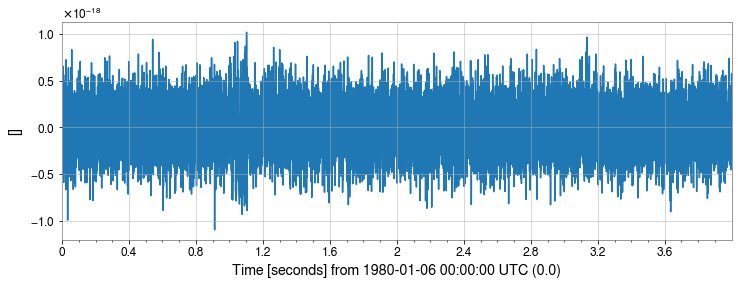

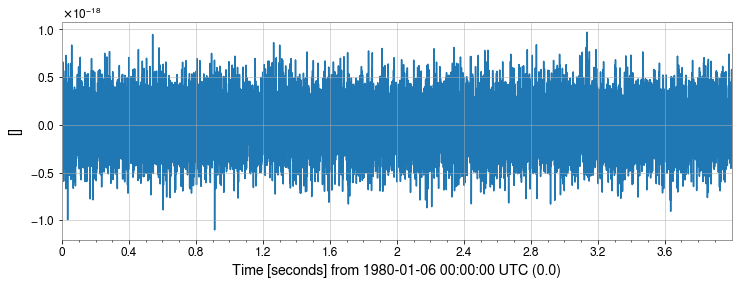

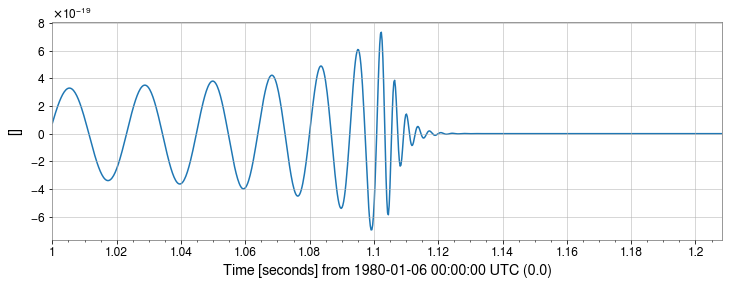

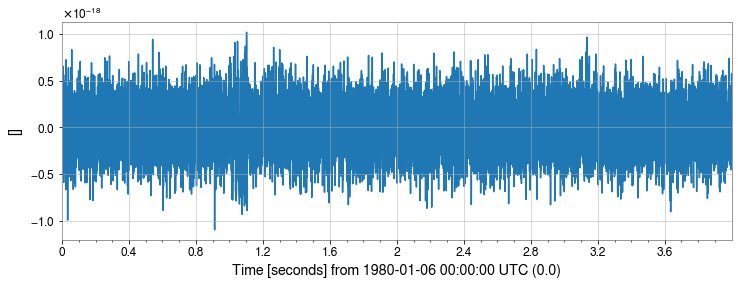

In [12]:
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)

hp, hc = get_td_waveform(approximant="SEOBNRv2",                                # what are hp and hc?
                        mass1=bbh_two_mass_samples[0][0],
                        mass2=bbh_two_mass_samples[0][1],
                        delta_t=1.0/4096,
                        f_lower=40)                                                # change to 40 Hz

noise = TimeSeries(np.random.normal(scale=1, size=16384), sample_rate=4096)    # did not understand clearly    # try scale = 1 
noise= noise*1e-18
# st = np.random.randint(0,2)

st = 1

signal = TimeSeries.from_pycbc(hp)

signal.t0 = st
data = noise.inject(signal)

noise.plot()
signal.plot()
data.plot()